<a href="https://colab.research.google.com/github/siddu022/Titanic_survival_prediction/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**DATA Collection & Processing**


In [ ]:
#loading the data from csv file to pandas DataFrame
titanic_data = pd.read_csv('/titanic.csv')

In [ ]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
# number of rows and Columns
titanic_data.shape

(1309, 12)

In [ ]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   Sibsp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId       0
Pclass            0
Survived          0
Name              0
Sex               0
Age             263
Sibsp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Handling the **Missing** values

In [ ]:
#drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())


0    S
dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Pclass         0
Survived       0
Name           0
Sex            0
Age            0
Sibsp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Analysis**

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()


,PassengerId,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.309921
std,378.020061,0.837836,0.486055,12.883199,1.041658,0.865560,51.741517
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    809
1    500
Name: Survived, dtype: int64

**Data Visualization**

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


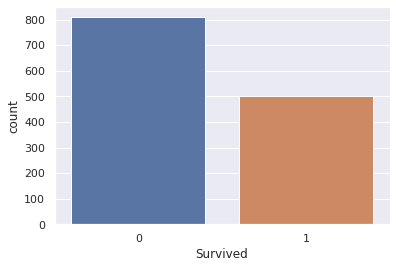

In [ ]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


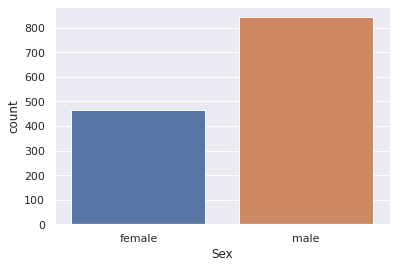

In [ ]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


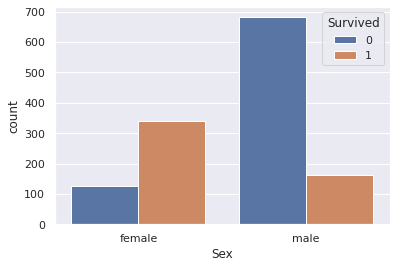

In [ ]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


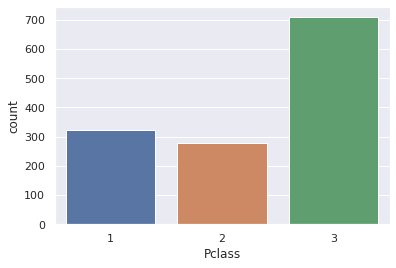

In [ ]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


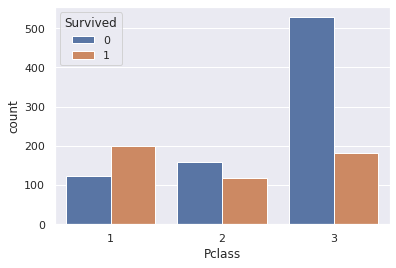

In [ ]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

**Encoding the Categorical column**

In [ ]:
titanic_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,0
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,0
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,0
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,0


**Separating features & Target**

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

      Pclass  Sex        Age  Sibsp  Parch      Fare  Embarked
0          1    1  29.000000      0      0  211.3375         0
1          1    0   0.916700      1      2  151.5500         0
2          1    1   2.000000      1      2  151.5500         0
3          1    0  30.000000      1      2  151.5500         0
4          1    1  25.000000      1      2  151.5500         0
...      ...  ...        ...    ...    ...       ...       ...
1304       3    1  14.500000      1      0   14.4542         1
1305       3    1  29.881135      1      0   14.4542         1
1306       3    0  26.500000      0      0    7.2250         1
1307       3    0  27.000000      0      0    7.2250         1
1308       3    0  29.000000      0      0    7.8750         0

[1309 rows x 7 columns]


In [ ]:
print(Y)

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64


**Splitting the data into the Trained Data & Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1309, 7) (1047, 7) (262, 7)


**Model Training**

Logistic Regression

In [ ]:
model = LogisticRegression()


In [ ]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Model Evaluation**

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction) 

[1 0 1 ... 0 0 0]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7812798471824259


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8282442748091603
